EMPLOYEE EARNINGS REPORT (2017)

NORTHEASTERN UNIVERSITY, BOSTON

NAME: VIVEK NIMISH SHAH

SUBMITTED TO: Prof. Daya Rudhramoorthi

DATE: JUNE 27, 2020

DATASET LINK:

Analytics Boston. (2020, January). Employee Earnings Report. Retrieved June 11, 2020, from https://data.boston.gov/dataset/employee-earnings-report

The dataset contains payroll information of employee’s names, job details and earning information which includes overtime, base salary and compensations in total for employees in the city for the finanacial year 2017.  







DATASET DESCRIPTION:

1) NAME:
Last name and first name of the employee


2) DEPARTMENT NAME:
Name of the Department where the employee is working

3) TITLE:
Job Role of the employee

4) REGULAR:
The base salary of the employee without including over time, educational incentive or servce incentive


5) RETRO:
Compensation paid for employee for work in previous period


6) OTHER:
Bonus Incentive Earnings due to any promotions or skills


7) OVER TIME:
Earnings due to the extra hours worked


8) INJURED:
Regular injured and Retro injured earnings


9) DETAIL:
Detail pay of the employee


10) QUINN/EDUCATIONAL INCENTIVE:
Earnings for any higher degree obtained by the Employee in same department


11) TOTAL EARNINGS:
All earnings received during 2017. This includes Regular salary, Over Time pay, Retro pay, Injured pay, Educational Incentive, detail and other pay.


12) POSTAL:
The area code in Boston

IMPORTING REQUIRED LIBRARIES 

In [2]:
# Data Extraction and Exploration

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Predictive Analytics 

from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

EXTRACTING DATASET USING PANDAS

In [4]:
# Extracting dataset using pandas

report_2017 = pd.read_csv('earnings2017.csv')
report_2017.head(5)

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190


EXPLORATORY DATA  ANALYSIS:

1) Identify which employee is highly educated based on the QUINN/EDUCATION INCENTIVE


2) Identify which employee in the department gets highest base salary and from which area(postal).


3) Identify the employee who is working for long hours based on highest OVERTIME payment.


4) Which position is the top position among all departments based on the REGULAR payment.


DATA VISUALIZATIONS:

1) Explaining the distribution of each pay column of data with the help of histograms.

2) Identifying how much amount of each pay contributed for total earnings for different postal codes.


3) Lastly, Implot for Quinn and Base pay.


PREDICTIVE ANALYTICS:

1) Check whether increase in percentage of QUINN/EDUCATION INNCENTIVE does the employees get high regular pay of not. Predicting the Regular based on quinn/education inncentive.


2) Plot for Regular and Retro, and checking their distribution.


3) Check if highly educated employees work for long hours or not.

In [4]:
# Data cleanup

# To check total count of values present and not the null counts
report_2017.info()

# Description of the dataset 
report_2017.describe()

# Data columns 
report_2017.columns.tolist()

# Check shape of the dataset
report_2017.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22245 non-null  object
 1   DEPARTMENT NAME            22245 non-null  object
 2   TITLE                      22245 non-null  object
 3   REGULAR                    21640 non-null  object
 4   RETRO                      3258 non-null   object
 5   OTHER                      13083 non-null  object
 6   OVERTIME                   6783 non-null   object
 7   INJURED                    1283 non-null   object
 8   DETAIL                     2423 non-null   object
 9   QUINN/EDUCATION INCENTIVE  1259 non-null   object
 10  TOTAL EARNINGS             22245 non-null  object
 11  POSTAL                     22242 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


(22245, 12)

DATA CLEANING

1) Checking the duplicates in all columns.


2) Cleaning unwanted data in Postal column.


3) Check for missing data. 


4) Checking the data types of all columns.


5) Dropping some rows with NaN values for better analysis i.e. for visuals purpose. 

In [5]:
# Data cleanup
# check for duplicates 

# First checking uniqueness of the columns
report_2017['NAME'].is_unique
report_2017['DEPARTMENT NAME'].is_unique
report_2017['POSTAL'].is_unique



False

In [6]:
# Data cleanup
# Check for duplicates

# Check duplicates in 'NAME' column with different postal codes
names_2017 = report_2017['NAME'].value_counts()
print(names_2017[names_2017>1])


Sullivan,Michael     4
Kelly,Michael        3
Thompson,Anthony     2
Lopez,Antonio        2
Walsh,Patricia       2
                    ..
Mullaly,Michelle     2
Simon,Victor         2
Powers,Kathleen      2
Griffin,Daniel G.    2
Smith,Robert         2
Name: NAME, Length: 76, dtype: int64


In [7]:
# Data cleanup
# Check for duplicates

# Check for duplicate rows in the dataset
report_2017.groupby(report_2017['NAME']).apply(np.shape)
print(report_2017.duplicated('NAME'))

0        False
1        False
2        False
3        False
4        False
         ...  
22240    False
22241     True
22242    False
22243    False
22244    False
Length: 22245, dtype: bool


In [8]:
# Data cleanup
# Check for duplicates

# Check the most repeated name i.e. Sullivan Michael
names_df = report_2017['NAME'] == 'Sullivan,Michael'
report_2017.loc[names_df]

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
7035,"Sullivan,Michael",Boston Police Department,Police Detective,"$89,187.23","$11,497.83","$5,153.35","$39,038.10",NaN,$368.00,"$15,107.20","$160,351.71",2093
9019,"Sullivan,Michael",Boston Fire Department,Fire Fighter,"$106,051.12",NaN,"$3,154.59","$14,360.92",NaN,"$29,165.75",NaN,"$152,732.38",2038
11881,"Sullivan,Michael",Public Works Department,Maint Mech (Millwright)##,"$49,782.93",$782.84,$542.50,"$4,316.23",NaN,NaN,NaN,"$55,424.50",2122
13539,"Sullivan,Michael",Parks Department,Summer Youth Worker,"$28,661.25",NaN,NaN,NaN,NaN,NaN,NaN,"$28,661.25",2131


In [9]:
# Data cleanup
# Check for duplicates

# Check shape of the dataset before and after droping duplicates
report_2017.shape #before
report_2017 = report_2017.drop_duplicates()
report_2017.reset_index(drop = True, inplace = True)
report_2017.shape #after

(22245, 12)

In [10]:
# Data cleanup

# Removing any special symbols present in first 3 column sof data set
report_2017['TITLE']= report_2017['TITLE'].str.replace(r"\(.*\)","")
report_2017['DEPARTMENT NAME']= report_2017['DEPARTMENT NAME'].str.replace(r"\(.*\)","")
report_2017['TITLE'] = report_2017['TITLE'].str.split('/').str[0]
report_2017['TITLE'] = report_2017['TITLE'].str.split('-').str[0]
report_2017['TITLE'] = report_2017['TITLE'].str.split(',').str[0]
report_2017['DEPARTMENT NAME'] = report_2017['DEPARTMENT NAME'].str.split('/').str[0]
report_2017['DEPARTMENT NAME'] = report_2017['DEPARTMENT NAME'].str.split('-').str[0]

In [11]:
# Data cleanup

# Removing characters from the 'NAME','DEPARTMENT_NAME' and 'TITLE' columns 

report_2017[report_2017['NAME']=='King,Peter']
report_2017[['DEPARTMENT NAME','TITLE']] = report_2017[['DEPARTMENT NAME','TITLE']].replace({'\$': '', ',': '','\##':'','\###':'','""':'','#':''}, regex=True)


In [12]:
# Data cleanup

# Removing special characters in 'NAME'
report_2017['NAME'] = report_2017['NAME'].str.replace(","," ")
report_2017['NAME'] = report_2017['NAME'].str.replace("."," ")


In [13]:
# Data cleanup
# Final check whether above cleanup is been done or not

report_2017[report_2017['NAME'] == 'Kelly,Ann Marie']
report_2017.head(10)

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,Miller Francis T,Boston Police Department,Police Lieutenant,"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,Sullivan Patrice Murphy,Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,O'Hara Michael C,Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,Whalen Richard L,Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,Kelly Ann Marie,Boston Police Department,Tape Librarian I,"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190
5,Carroll William F,Boston Police Department,Police Offc,"$12,756.79","$2,390.14","$41,612.10",$912.04,NaN,NaN,"$1,563.30","$59,234.37",2131
6,Connolly John J,Boston Police Department,Police Officer,"$93,180.42","$2,027.71","$13,338.20","$19,881.93",NaN,"$28,934.00","$14,733.53","$172,095.79",2339
7,Ivens Paul M,Boston Police Department,Police Captain,NaN,NaN,"$60,777.01",NaN,"$2,658.71",NaN,$498.51,"$63,934.23",2339
8,Kelly John R,Boston Police Department,Police Sergeant,"$13,827.39",NaN,"$62,393.08",$867.60,NaN,NaN,"$2,074.11","$79,162.18",2492
9,Klokman John A,Boston Police Department,PoliceSergeant,"$107,599.31",NaN,"$14,482.47","$12,824.85",NaN,"$99,640.00","$16,140.15","$250,686.78",2134


In [14]:
# Data cleanup
# Handling missing values, 'NaNs', Null 

# Null values in the data set
report_2017.isnull().any()
report_2017.isnull().any().any()
report_2017.info()

# describe data without null values
report_2017.dropna().describe()

# describe data with all values
report_2017.describe()

# Count of NaN values in data
report_2017.isnull()
report_2017.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NAME                       22245 non-null  object
 1   DEPARTMENT NAME            22245 non-null  object
 2   TITLE                      22245 non-null  object
 3   REGULAR                    21640 non-null  object
 4   RETRO                      3258 non-null   object
 5   OTHER                      13083 non-null  object
 6   OVERTIME                   6783 non-null   object
 7   INJURED                    1283 non-null   object
 8   DETAIL                     2423 non-null   object
 9   QUINN/EDUCATION INCENTIVE  1259 non-null   object
 10  TOTAL EARNINGS             22245 non-null  object
 11  POSTAL                     22242 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


NAME                             0
DEPARTMENT NAME                  0
TITLE                            0
REGULAR                        605
RETRO                        18987
OTHER                         9162
OVERTIME                     15462
INJURED                      20962
DETAIL                       19822
QUINN/EDUCATION INCENTIVE    20986
TOTAL EARNINGS                   0
POSTAL                           3
dtype: int64

In [15]:
# Data types of columns
report_2017.dtypes

# Removing the '$' symbol and few characters in the data
# For creating visuals converting 'PAY' into float data type
# creating a list of required columns where we need to remove the $ symbol
cols=["REGULAR","RETRO","OTHER","OVERTIME","INJURED","DETAIL","QUINN/EDUCATION INCENTIVE","TOTAL EARNINGS"]

# Converting all object data type columns to String data type
report_2017['REGULAR'] = report_2017['REGULAR'].astype(str)
report_2017['RETRO'] = report_2017['RETRO'].astype(str)
report_2017['OTHER'] = report_2017['OTHER'].astype(str)
report_2017['OVERTIME'] = report_2017['OVERTIME'].astype(str)
report_2017['INJURED'] = report_2017['INJURED'].astype(str)
report_2017['DETAIL'] = report_2017['DETAIL'].astype(str)
report_2017['QUINN/EDUCATION INCENTIVE'] = report_2017['QUINN/EDUCATION INCENTIVE'].astype(str)

# Removing the '$' symbol from the pay details columns
report_2017[cols] = report_2017[cols].replace({'\$': '','\(': '', '\)':'', ',': ''}, regex=True)

# converting the data type of pay details of employee columns to float Data type
report_2017[cols] = report_2017[cols].astype(float)

# Data type of all columns of data set
report_2017.dtypes

# checking whether we can perform any operations or not
report_2017['REGULAR']*2

0        259061.66
1        113843.60
2        248113.28
3        189912.50
4        139990.68
           ...    
22240      3408.02
22241      5554.88
22242     13220.00
22243      2341.00
22244     12425.26
Name: REGULAR, Length: 22245, dtype: float64

In [16]:
# dropping NaN values in BASE PAY and TOTAL EARNINGS columns
report_2017 = report_2017.dropna(subset=['REGULAR', 'TOTAL EARNINGS','POSTAL'])
report_2017

# I removed all the NAN values in all columns to see who receive all payment options
report_2017_list = report_2017.dropna(subset=['REGULAR', 'TOTAL EARNINGS','RETRO','OTHER','OVERTIME','INJURED','DETAIL','QUINN/EDUCATION INCENTIVE','POSTAL'])
report_2017_list

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
3,Whalen Richard L,Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
159,Shoulla Christopher K,Boston Police Department,Police Offc Comm Serv Offc 38,72854.70,2410.37,8364.66,62211.53,21193.90,30406.0,18490.71,215931.87,2339
178,Colburn Robert P,Boston Police Department,Police Offc Canine 26,14733.76,2170.50,14232.27,2842.65,78984.76,7176.0,18470.46,138610.40,2081
207,Manning John J,Boston Police Department,Police Officer,29847.00,2457.15,800.00,9265.20,63339.98,11914.0,14733.53,132356.86,2370
260,Worthy Jeffrey Maurice,Boston Police Department,Police Officer,44597.40,1888.97,5982.59,5838.17,48467.81,10580.0,18318.81,135673.75,2119
...,...,...,...,...,...,...,...,...,...,...,...,...
17624,Lizardo Steven,Boston Police Department,Police Officer,82472.43,1443.11,800.00,29693.28,1901.17,7728.0,13457.25,137495.24,2136
17645,O'Brien Jonathan,Boston Police Department,Police Officer,84709.10,1571.50,800.00,36617.40,33.78,15594.0,6760.63,146086.41,2127
17649,Gigliello James M,Boston Police Department,Police Officer,53110.39,1253.05,1800.00,16265.53,29909.18,19274.0,13229.06,134841.21,2132
17664,Leo Rebecca J,Boston Police Department,Police Officer,52761.33,1384.55,800.00,8721.06,31947.77,2668.0,6979.79,105262.50,2131


DATA EXPLORATION

Post filtering the dataset, the dataset has details of employees who gets all types of payments. Here, exploring the dataset using the questions belows.

1) Employee with highest regular pay.
2) Highly educated employee.
3) Employee who works for long hours.


In [17]:
# Data Exploration 

# Check for employee with highest regular pay
highest_salary = report_2017_list['REGULAR'].idxmax()

print("Name of the employee who gets highest regular pay of all departments : ",report_2017_list.loc[highest_salary]['NAME'])

# Check department
print("highest base salary department is :",report_2017_list.loc[highest_salary]['DEPARTMENT NAME'])

# Check entire details of employee with highest regular pay
report_2017_list.loc[highest_salary]


Name of the employee who gets highest regular pay of all departments :  Brown Michael A
highest base salary department is : Boston Police Department


NAME                                  Brown Michael A
DEPARTMENT NAME              Boston Police Department
TITLE                                 Police Sergeant
REGULAR                                        102163
RETRO                                         2477.61
OTHER                                         8737.68
OVERTIME                                      29762.4
INJURED                                        2988.3
DETAIL                                          61904
QUINN/EDUCATION INCENTIVE                       19348
TOTAL EARNINGS                                 227381
POSTAL                                           2050
Name: 9964, dtype: object

In [18]:
# Check for highly educated employee with help of 'QUINN/EDUCATION INCENTIVE'

highest_pay = report_2017_list['QUINN/EDUCATION INCENTIVE'].idxmax()
print(" The employee who is highly educated and gets high QUINN/EDUCATION incentive is :",report_2017_list.loc[highest_pay]['NAME'])

# Checking completing details of the above employee
report_2017_list.loc[highest_pay]

 The employee who is highly educated and gets high QUINN/EDUCATION incentive is : Difazio Vincent J


NAME                                Difazio Vincent J
DEPARTMENT NAME              Boston Police Department
TITLE                                Police Detective
REGULAR                                       37969.1
RETRO                                          1977.4
OTHER                                         9548.65
OVERTIME                                      31197.2
INJURED                                       60872.1
DETAIL                                           8740
QUINN/EDUCATION INCENTIVE                     20670.5
TOTAL EARNINGS                                 170975
POSTAL                                           2351
Name: 363, dtype: object

In [19]:
# Check for employee who usually wokrs overtime

highest_pay_overtime = report_2017_list['OVERTIME'].idxmax()
print(" The employee who gets highest overtime pay is :",report_2017_list.loc[highest_pay_overtime]['NAME'])

# Details of the employee
report_2017_list.loc[highest_pay_overtime]

 The employee who gets highest overtime pay is : Whalen Richard L


NAME                                 Whalen Richard L
DEPARTMENT NAME              Boston Police Department
TITLE                                Police Detective
REGULAR                                       94956.2
RETRO                                         4985.32
OTHER                                         13591.9
OVERTIME                                      85419.2
INJURED                                         58.03
DETAIL                                          16330
QUINN/EDUCATION INCENTIVE                       19971
TOTAL EARNINGS                                 235312
POSTAL                                           2062
Name: 3, dtype: object

DATA VISUALIZATION

1) Total Earnings of employees in different areas(postal).


2) Position of Employee with higher regular pay.


3) Identifying which type of pay contributed more to total earnings in different postal.


4) A combined plot for TOTAL EARNINGS vs INJURED PAY.

In [20]:
# Data visualization 

# Check for all employees who recieve all payments

report_2017_list.sort_values('TOTAL EARNINGS', ascending=False, inplace=True)
top_earnings=report_2017_list.head(10)
top_earnings

C:\Users\Vivek Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
10929,Almeida Ismael Lopes,Boston Police Department,Police Officer,86918.09,5650.64,800.00,24288.60,654.55,126822.0,13961.83,259095.71,2124
3,Whalen Richard L,Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
5580,Gero Jarrod A,Boston Police Department,Police Detective,84757.51,14709.90,3979.71,84081.42,3422.78,22080.0,15216.29,228247.61,2132
9964,Brown Michael A,Boston Police Department,Police Sergeant,102162.90,2477.61,8737.68,29762.42,2988.30,61904.0,19348.03,227380.94,2050
1093,Maloney Thomas F,Boston Police Department,Police Officer,90200.16,3557.76,4213.04,7882.04,1432.50,102350.0,14318.16,223953.66,2127
676,Fleming Edward J,Boston Police Department,Police Officer,90498.50,6744.43,9572.86,34129.15,683.45,66424.0,14504.06,222556.45,2360
1009,James Alfred A,Boston Police Department,Police Officer,67578.97,2796.07,8442.90,47050.73,26751.21,48806.0,14525.53,215951.41,2301
159,Shoulla Christopher K,Boston Police Department,Police Offc Comm Serv Offc 38,72854.70,2410.37,8364.66,62211.53,21193.90,30406.0,18490.71,215931.87,2339
518,Aviles Elvin,Boston Police Department,Police Officer,93180.42,2305.80,4091.29,37800.10,47.57,61456.0,14733.53,213614.71,2131
1304,Hill Dudley N,Boston Police Department,Police Officer,90908.77,6696.18,4123.00,56186.33,664.60,37858.0,14543.20,210980.08,2136


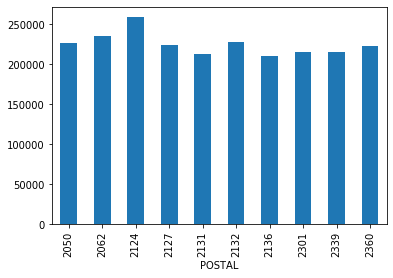

In [21]:
# Plotting them with repsect to 'POSTAL'

top_earnings.groupby('POSTAL')['TOTAL EARNINGS'].mean().plot(kind='bar')

[None, None, None, None, None, None, None, None]

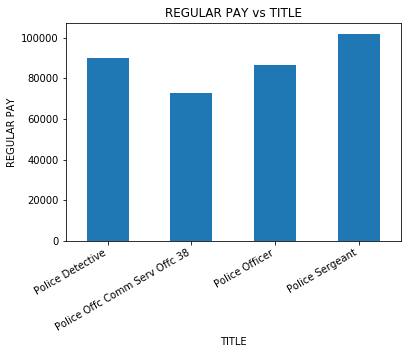

In [22]:
# Plot for employee with higher regular pay with respect to 'TITLE'

ax=top_earnings.groupby('TITLE')['REGULAR'].mean().plot(kind='bar')
plt.ylabel('REGULAR PAY')
plt.title("REGULAR PAY vs TITLE")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

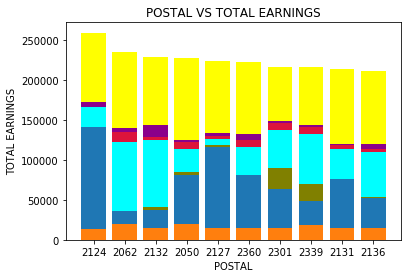

In [23]:
# Check which attribute contributed the most to 'TOTAL EARNINGS' with respect to 'POSTAL'

rp=top_earnings['REGULAR']
dp=top_earnings['DETAIL']
op=top_earnings['OTHER']
otp=top_earnings['OVERTIME']
retp=top_earnings['RETRO']
ip=top_earnings['INJURED']
qp=top_earnings['QUINN/EDUCATION INCENTIVE']
p=top_earnings['POSTAL']
plt.bar(p,rp,bottom=dp+op+retp+ip+qp+otp,color='yellow') # REGULAR
plt.bar(p,retp,bottom=dp+op+ip+qp+otp,color='darkmagenta')   # RETRO
plt.bar(p,op,bottom=dp+ip+qp+otp,color='crimson')  # OTHER 
plt.bar(p,otp,bottom=dp+ip+qp,color='aqua')     # OVERTIME
plt.bar(p,ip,bottom=dp+qp,color='olive') # INJURED
plt.bar(p,dp,bottom=qp)   #DETAIL
plt.bar(p,qp)   #QUINN/EDUCATION INCENTIVE
plt.title('POSTAL VS TOTAL EARNINGS')
plt.xlabel("POSTAL")
plt.ylabel("TOTAL EARNINGS")
plt.show()

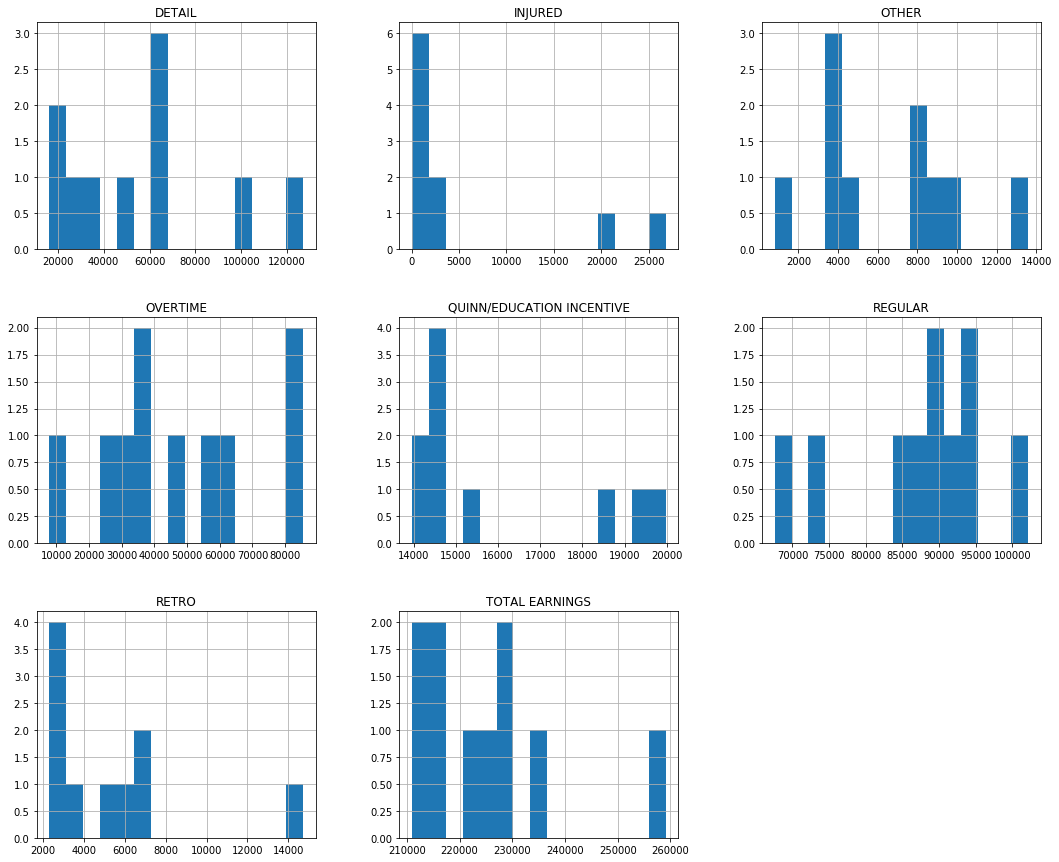

In [24]:
# Visualization for each attribute (HISTOGRAM PLOT)

top_earnings.hist(bins=15, figsize=(18,15))
plt.ylabel('Frequency')
plt.show()

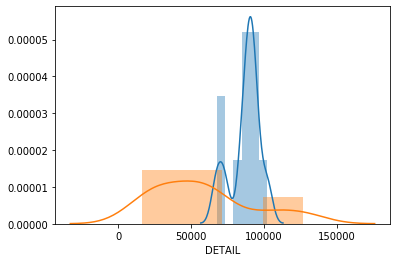

In [25]:
# To identify mean is on which side of the data i.e. right side or left side

sns.distplot(top_earnings['REGULAR'])
sns.distplot(top_earnings['DETAIL'])

# Distribution plot of 'DETAIL' is left tailed compared to 'REGULAR'

IMPLOT FOR QUINN/EDUCATION INNCENTIVE AND REGULAR PAY

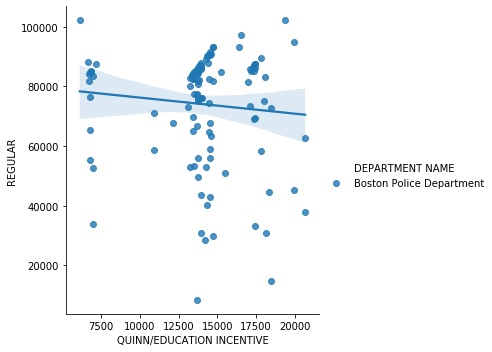

In [26]:
# Using seaborn for visualizations 

import seaborn as sns
sns.lmplot(x='QUINN/EDUCATION INCENTIVE', y='REGULAR', hue='DEPARTMENT NAME', data=report_2017_list)

PREDICTIVE ANALYSIS

1) Distribution plot for REGULAR, RETRO and QUINN/EDUCATION INCENTIVE.

INTERPRETATION: 

1) The distribution of Quinn/education pay is very less compared to regular pay and Retro pay.


2) The REGULAR pay is highly distributed and has large mean value compared to quinn/education INCENTIVE and retro pay.


3) Based on the distribution of these pays, we can identify what type of pay the employees receives more.


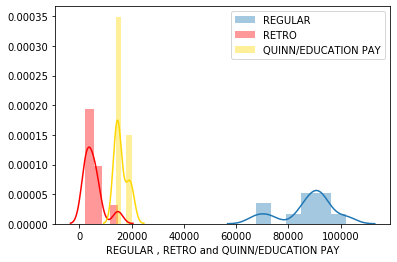

In [27]:
import statsmodels
import statsmodels.stats as stats
x=top_earnings['REGULAR']
y=top_earnings['RETRO']
z=top_earnings['QUINN/EDUCATION INCENTIVE']
sns.distplot(x)
sns.distplot(y, color='red')
sns.distplot(z, color='gold')
plt.xlabel("REGULAR , RETRO and QUINN/EDUCATION PAY")
plt.legend(['REGULAR', 'RETRO', 'QUINN/EDUCATION PAY'])

PREDICTING THE REGULAR PAY BASED ON QUINN/EDUCATION INCENTIVE 

1) The employees who get high QUINN/EDUCATION INCENTIVE are highly educated and they get incremented regular pay.

2) Studying whether the REGULAR PAY increased with increase of QUINN/EDUCATION INCENTIVE.

3) Here, I have used linear model regression for predicting the regular pay.

INTERPRETATION: 
    
1) Here, with increment in Quinn/education incentive the regular pay is not increasing.


2) The employees who get high QUINN/EDUCATION INCENTIVE receives less regular pay from the plot.


3) We can see the line which gives the predictive values of regular pay based on QUINN/EDUCATION INCENTIVE.

y:(123, 1)
X:(123, 2)


C:\Users\Vivek Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Vivek Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'REGULAR PERCENT')

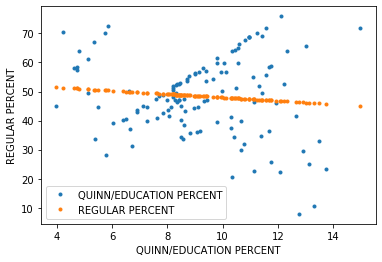

In [28]:
from sklearn import linear_model
from patsy import dmatrices

report_2017_list['QUINN/EDUCATION PERCENT']=((report_2017_list['QUINN/EDUCATION INCENTIVE']/report_2017_list['TOTAL EARNINGS'])*100).astype(float)
report_2017_list['REGULAR PERCENT']=((report_2017_list['REGULAR']/report_2017_list['TOTAL EARNINGS'])*100).astype(float)

y=report_2017_list['REGULAR PERCENT']
X=report_2017_list['QUINN/EDUCATION PERCENT']

y,X = dmatrices('y ~ X', data=report_2017_list)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))
model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(X,y )
plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['QUINN/EDUCATION PERCENT', 'REGULAR PERCENT'])
plt.xlabel("QUINN/EDUCATION PERCENT")
plt.ylabel("REGULAR PERCENT")

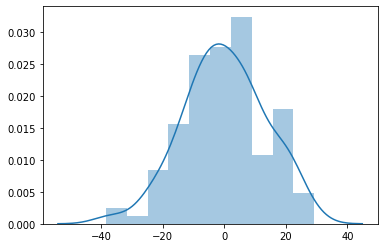

In [29]:
# plot for above prediction
sns.distplot(y - model.predict(X))

C:\Users\Vivek Shah\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vivek Shah\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Vivek Shah\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Vivek Shah\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'REGULAR PERCENT')

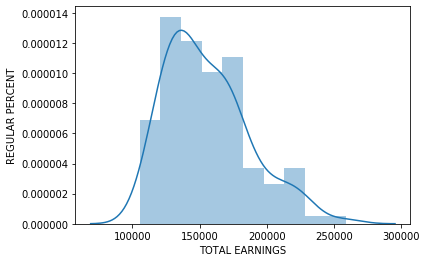

In [30]:
#df_report_2017_list['QUINN PERCENT']=((df_report_2017_list['QUINN/EDUCATION INCENTIVE ($)']/df_report_2017_list['TOTAL EARNINGS ($)'])*100).astype(float)

report_2017_list['REGULAR PERCENT']=((report_2017_list['REGULAR']/report_2017_list['TOTAL EARNINGS'])*100).astype(float)
y=report_2017_list['REGULAR PERCENT']
X=report_2017_list['TOTAL EARNINGS']
y, X = dmatrices('y ~ X', data=report_2017_list)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])
plt.xlabel("TOTAL EARNINGS")
plt.ylabel("REGULAR PERCENT")


CONCLUSION: 

1) The employees with same title in different postal in Boston receive different salaries. In my opinion it totally depends on their experience and the qualification whicch is acutally influencing their pay along with how many hours i.e. overtime they are working.


2) The dataset Employee Earnings Report, the employees belong to different departments with different position titles.It is not necessary that the employees who receive high regular pay doesn't receive high quinn/education incentive. The regular pay and the overtime pay contribute more to total earnings than the rest of the pay types. It is possible that most of the employees work hard and they would receive high overtime pay than their regular pay.

3) Using Predictive analytics, performed analysis of Quinn/education incentive and overtime pay. Through this it is concluded that the employees does work hard though they are highly educated.